![title](header.png)

## Introduction

Matplotlib is the "grandfather" data visualisation tool for data in Python - it offers unparalleled control over graphs and diagrams for data, and lets us annotate and customise figures to our heart's content. Matplotlib is built upon for other important modules we'll use later, such as Seaborn, which is more used for statistical visualisation.

All the documentation for Matplotlib can be found [here](http://matplotlib.org/)

## Recap - Functional Plotting

We can create quick and dirty graphs using the functional method as we've seen before. This method is simpler but won't allow us to customise our plots as much.

First, we need to import our modules:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

If we're running in a notebook, we can run the following line of code to save us from writing plt.show() to give us our graphs. Spyder automatically shows plots, so we don't need this line of code and everything will still work as normal.

In [2]:
%matplotlib inline

We can then graph any data we want using the plt.plot command. Here we will use the <i>np.linspace</i> function to generate a numpy array called x with 101 equally spaced points between 0 and 10, and another numpy array called y that is simply x squared. (Remember numpy arrays can be operated on and the operation will apply element-wise)

In [3]:
x = np.linspace(0,10,101)
y = x**2

We can then plot the graph of x versus y by using the plt.plot() function:

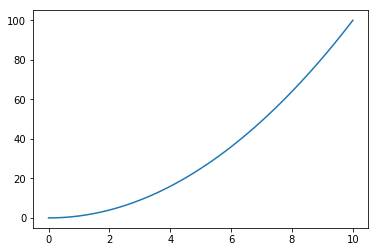

In [4]:
plt.plot(x,y)

Great! From here we could add more plots, linestyles, x labels, y labels, titles and more using various methods:

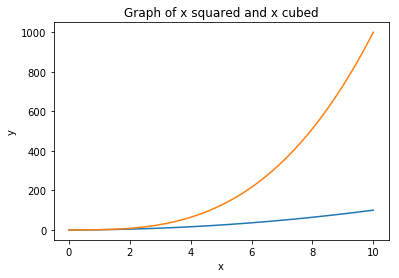

In [5]:
plt.plot(x,x**2,x,x**3)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Graph of x squared and x cubed")

We can also create multiple plots on one output. These are called subplots, and to do this we use the plt.subplot() function - this takes 3 arguments - the number of rows, the number of columns, and then the plot number we're refering to. This may seem like an ugly way to do things, and we'll see a better way to do it later with the object orientated method.

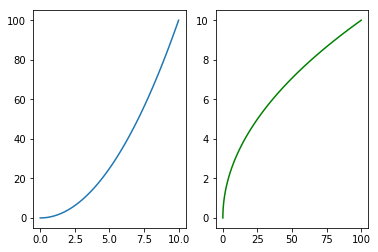

In [6]:
plt.subplot(1,2,1)
plt.plot(x,x**2)

plt.subplot(1,2,2)
plt.plot(x**2,x,'g')

## Object Orientated - There has to be a better way!

The problem with the functional method is that it's a bit of a mess: Commands can be a bit hard to work with and understand at a glance, and problems often happen because of ambiguity in code. Python works on an "object orientetated" philosophy so it makes sense for us to use a similar methodology for graphing. The object orientated way of creating plots works by creating figure objects and calling methods on it.

To start, we need to create a figure:

In [7]:
fig = plt.figure()

Figures are a blank canvas for us to work on. To add axis, we use the add.axes() method. We can always look at our figure by just running it as a line of code:

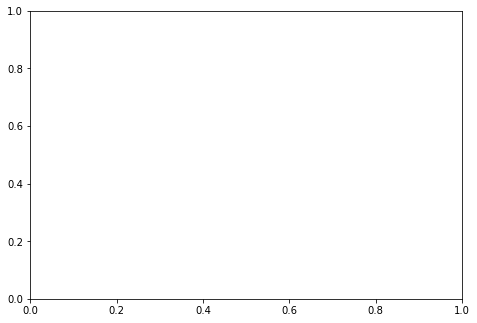

In [8]:
axes = fig.add_axes([0,0,1,1])

fig

Techinically, the "add_axes" method takes in one arguement - a list. This list has 4 elements - the x position with respect to the left of the axis (in percent), the y position with respect to the bottom of the axis (also in percent) - so here, 0,0 just means we don't want white space - and width and height (so here, 1,1 means width 1, height 1).

Now if we want to plot something on these axis, we call the "plot" method with respect to the axes:

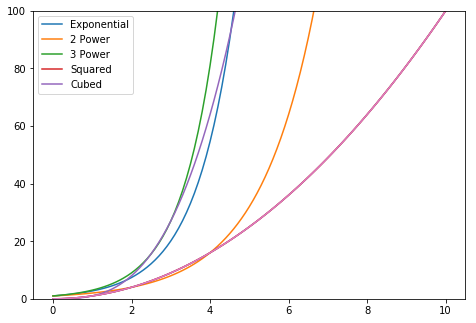

In [26]:
axes.plot(x,y)

fig

We can also add x labels, y lables, and more using the following methods:

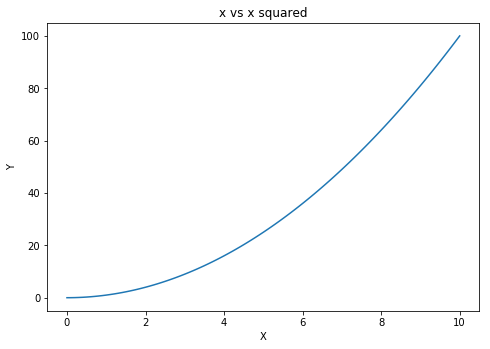

In [10]:
axes.set_xlabel('X')
axes.set_ylabel('Y')
axes.set_title('x vs x squared')

fig

Now let's see why the object orientated way of creating graphs is so much more powerful:

To start, we can create graphs within graphs:

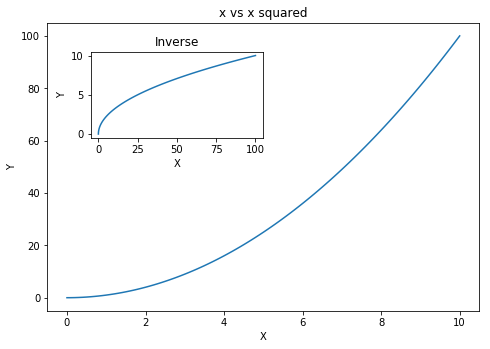

In [11]:
fig = plt.figure()

axes1 = fig.add_axes([0,0,1,1])
axes2 = fig.add_axes([0.1,0.6,0.4,0.3]) #Creating axes within our axes

axes1.plot(x,y)
axes2.plot(y,x)

axes1.set_xlabel('X')
axes1.set_ylabel('Y')
axes1.set_title('x vs x squared')

axes2.set_xlabel('X')
axes2.set_ylabel('Y')
axes2.set_title('Inverse')

We can also create subplots as before using a shortcut:

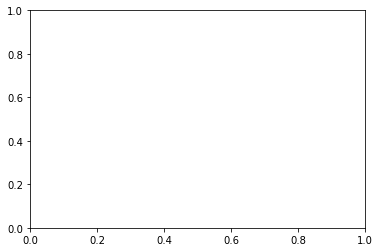

In [12]:
fig, axes = plt.subplots()

This combines the "fig" and "axes" call together assuming we want the large plot by using <i>tuple unpacking</i>. We can add arguements to the subplot method to create more plots:

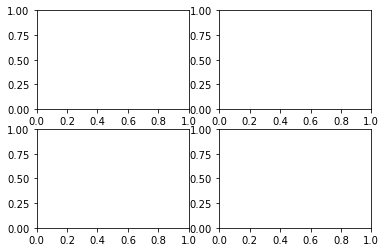

In [13]:
fig, axes = plt.subplots(2,2)

Notice that all the numbers are a little bit squished together - we can fix this using the <i>plt.tight_layout()</i> function:

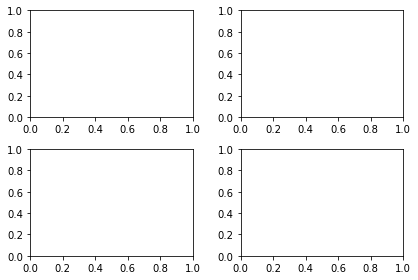

In [14]:
fig, axes = plt.subplots(2,2)
plt.tight_layout()

Great! For now, to learn how to access these axes let's work with a 2x1 subplot grid.

If we call the "axes" object after using the subplot command, we can see that "axes" is just a list of axes objects:

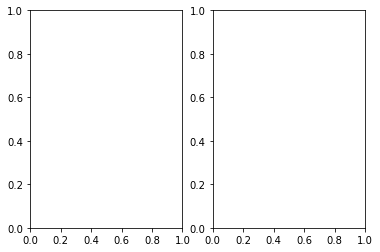

In [15]:
fig, axes = plt.subplots(1,2)

In [16]:
axes #Notice the square brackets? It's a list (technically a numpy array)!

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EB75B213C8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001EB760ED940>], dtype=object)

This means we can iterate over it, but more importantly, we can select what axes we want by using indexing:

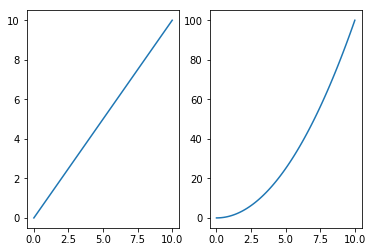

In [17]:
axes[0].plot(x,x)
axes[1].plot(x,x**2)

fig


Say we don't want to use two axes and we'd rather use one set of axes with two lines. We already know how to do this:

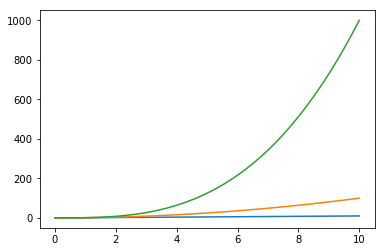

In [29]:
fig, ax = plt.subplots()

ax.plot(x,x)
ax.plot(x,x**2)
ax.plot(x,x**3)

How can we tell at a glance which plot is which? A legend would be helpful here - to do this we need to edit out code a little bit:

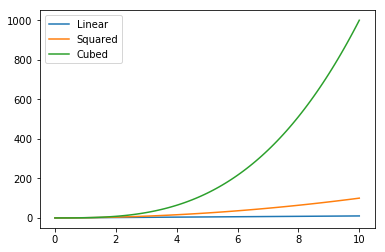

In [30]:
fig, ax = plt.subplots()

ax.plot(x,x, label='Linear')
ax.plot(x,x**2, label='Squared')
ax.plot(x,x**3, label='Cubed')

ax.legend()


Notice how we need to label our plots within their respective methods, and then call the legend method. A similar method is used to change the color and linestyles of these plots:

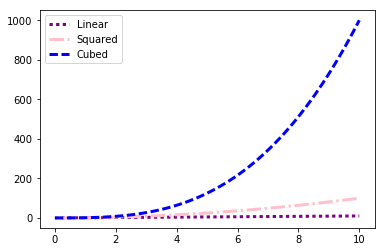

In [31]:
fig, ax = plt.subplots()

ax.plot(x,x, label='Linear', color = "purple", lw=3,ls=':')
ax.plot(x,x**2, label='Squared', color = "pink", lw =3,ls='-.')
ax.plot(x,x**3, label='Cubed', color = "blue", lw=3,ls='--')

ax.legend()


There are hundreds of different plot options out there, as well as the option for 3d plots, contour plots, log scaling and more! To check these out, take a look at the documentation [here](http://matplotlib.org/)

Finally, it's worth noting that we can use the object orientated method for scatter graphs, boxplots and histograms.

To start, let's take a scatter plot looking at a (albeit fake) positive correlation.

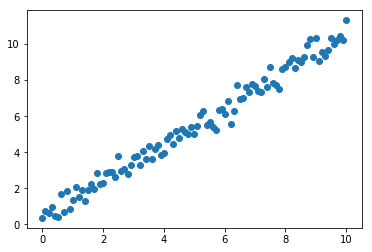

In [34]:
fig, axes = plt.subplots()


randomData = 0.4 * np.random.randn(101) + 0.5 #Nice way to fake a correlation - 0.4 is the slope, 0.5 is the intercept.

axes.scatter(x,randomData + x)


Next, let's look at how to create a histogram representing a normal distribution:

(array([  25.,   55.,  138.,  207.,  230.,  185.,  108.,   35.,   14.,    4.]),
 array([-2.56993424, -1.97147985, -1.37302546, -0.77457106, -0.17611667,
         0.42233772,  1.02079212,  1.61924651,  2.2177009 ,  2.8161553 ,
         3.41460969]),
 <a list of 10 Patch objects>)

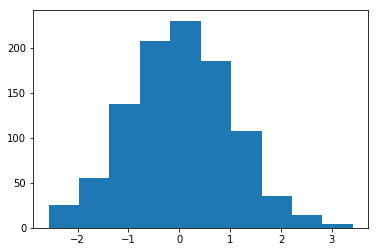

In [36]:
fig, axes = plt.subplots()

data = np.random.randn(1001)

axes.hist(data)

And finally, let's look at boxplots:

{'boxes': [<matplotlib.lines.Line2D at 0x1eb7793e5f8>,
 'caps': [<matplotlib.lines.Line2D at 0x1eb77949fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1eb77958898>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1eb779529e8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1eb7793ef60>,
  <matplotlib.lines.Line2D at 0x1eb7797fa58>]}

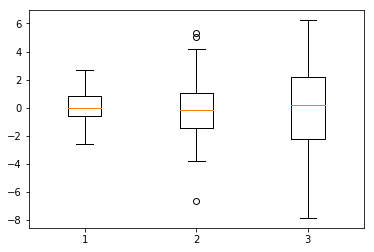

In [37]:
fig, axes = plt.subplots()


data = [np.random.normal(0,1,100),np.random.normal(0,2,100),np.random.normal(0,3,100)]

axes.boxplot(data)


Notice how the boxplot and histogram methods also output a lot of other useful information about the plots to access later if we want to. If we don't want these, we can just run fig again in another cell, or omit %matplotlib inline:

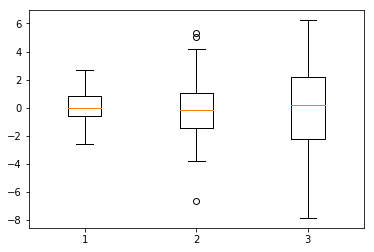

In [38]:
fig

## Worked Example

We're going to create a graph that looks at what happens to the graph of e<sup>x</sup>, 2<sup>x</sup>, 3<sup>x</sup>, x<sup>2</sup> and x<sup>3</sup>. Soon we will be able to import data so we're not working the mathematical functions all the time!

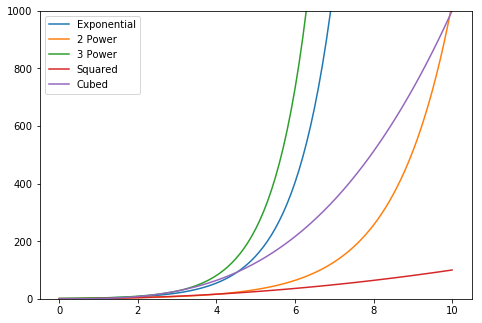

In [39]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.linspace(0,10,101)


fig = plt.figure()
axes = fig.add_axes([0,0,1,1])

axes.plot(x, np.exp(x), label = "Exponential")
axes.plot(x, 2**x, label = "2 Power")
axes.plot(x, 3**x, label = "3 Power")
axes.plot(x, x**2, label = "Squared")
axes.plot(x, x**3, label = "Cubed")

axes.set_ylim((0,1000))
axes.legend()

## Mini Project

Try graphing the sin(), cos() and tan() functions on one graph, adding a legend, title and axis. Then, try using the subplot command to put them all on different plots.

## More Resources

* http://www.matplotlib.org - The project web page for matplotlib.
* https://github.com/matplotlib/matplotlib - The source code for matplotlib.
* http://matplotlib.org/gallery.html - A large gallery showcaseing various types of plots matplotlib can create. Highly recommended! 
* http://www.loria.fr/~rougier/teaching/matplotlib - A good matplotlib tutorial.
* http://scipy-lectures.github.io/matplotlib/matplotlib.html - Another good matplotlib reference.
